# Medical Insurance Cost prediction

This exercise is about predicting Medical Insurance Cost for the California Housing Data.

# Get the Data

In [1]:
import pandas as pd

medical = pd.read_csv("https://bit.ly/44evDuW")

# Take a Quick Look at the Data Structure

In [2]:
# display the first 5 rows of the dataset by calling the head() function on medical
medical.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Each row represents one patient.
There are 7 attributes.

The `info()` method gets a quick description of the data, in
particular the total number of rows, each attribute’s type, and the number
of non-null values:

In [3]:
# get the number of rows, columns, and data types by using the info() method
medical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
# show the number of patients in each region by using the value_counts() method on the "region" column
medical["region"].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

The describe() method shows a summary
of the numerical attributes.

In [5]:
# show descriptive statistics for the dataset by calling the describe() method on medical
medical.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

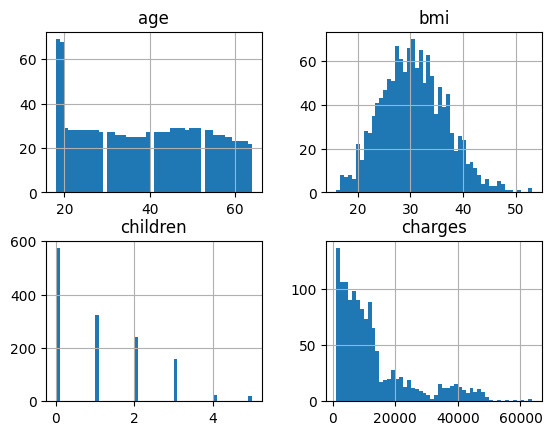

In [6]:
# show histograms for the numerical columns by using the hist() method on medical
medical.hist(bins=50)

What is observed from these histograms:

• For the attribute age, the data is capped at 64 for older people and capped at 18 for younger people.

• These attributes have very different scales.

• The distribution of the age group is quite even.

• Most of the people in this dataset have the bmi between 20 and 40.

• The distribution of the medical charge is right-skewed and most of the people in the dataset have the medical charges below 20000.  

## Create a Test Set

In [7]:
# use train_test_split() to split the data into training and test sets
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(medical, test_size=0.1, random_state=42)

# Explore and Visualize the Data to Gain Insights

Now the goal is to
go into a little more depth.


In [8]:
# make a copy of the train set and save it to a variable called medical
medical = train_set.copy()

<Axes: >

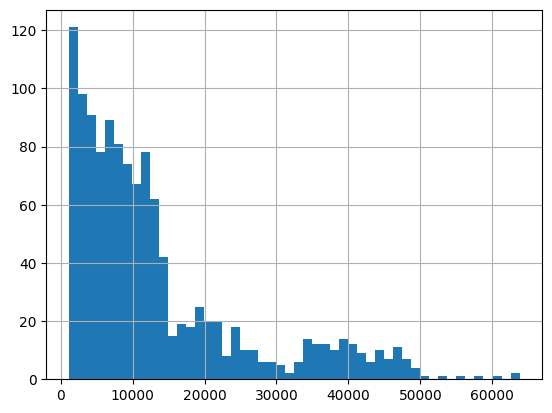

In [9]:
# build a histogram of the charges column
medical["charges"].hist(bins=50)

This distribution is right-skewed. Apply natural log to make it closer to normal.

array([[<Axes: title={'center': 'charges'}>]], dtype=object)

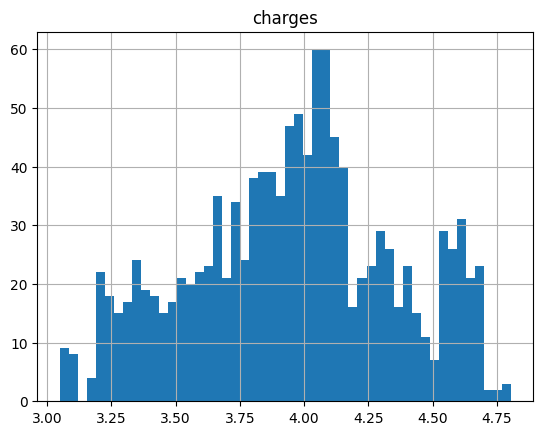

In [21]:
# apply a log transformation to the charges column using the np.log10() function
# build a histogram of the transformed column

from sklearn.preprocessing import FunctionTransformer
import numpy as np

log_transformer = FunctionTransformer(np.log10)
log_charges = log_transformer.fit_transform(medical[["charges"]])

log_charges.hist(bins=50)

Now look at the mean charges by region

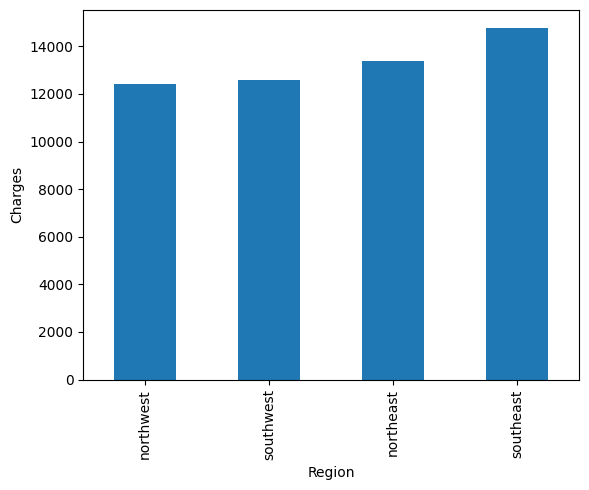

In [20]:
# compute the average insurance cost for each region
# sort the charges_by_region Series from the lowest to highest cost
# plot the sorted Series using the plot.bar() method
import matplotlib.pyplot as plt
charges_by_region = medical.groupby("region")["charges"].mean().sort_values(ascending=True)

charges_by_region.plot.bar()
plt.xlabel("Region")
plt.ylabel("Charges")
plt.show()


Overall the highest medical charges are in the Southeast and the lowest are in the Southwest. Taking into account certain factors (sex, smoking, having children) let's see how it changes by region.

Now, create three grouped barcharts for average charges by region grouped by sex, smoking, and number of children.

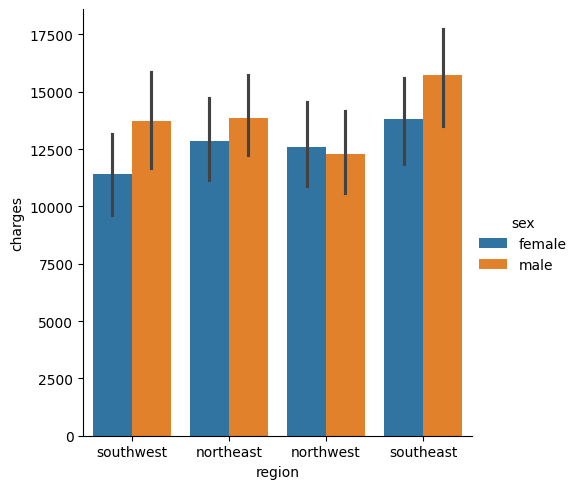

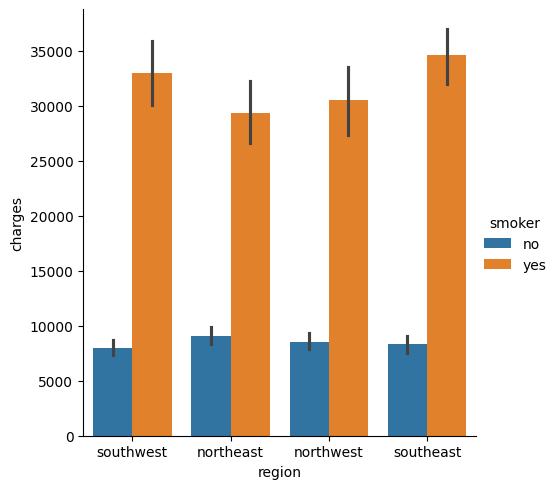

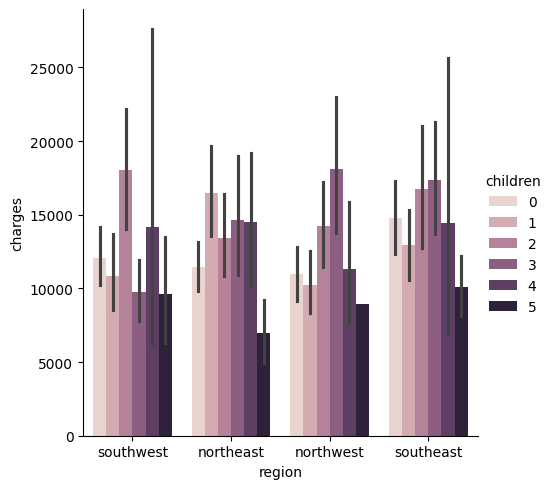

In [12]:
# plot grouped bar charts of region and insurance costs hue by sex, smoker, and number of children (three separate charts)
# use the catplot() function to create the bar charts
# set the kind parameter to "bar" and the data parameter to medical

import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(data=medical, x="region", y="charges", hue="sex", kind="bar")
sns.catplot(data=medical, x="region", y="charges", hue="smoker", kind="bar")
sns.catplot(data=medical, x="region", y="charges", hue="children", kind="bar")


**Observations** 

• The males tend to have a higher medical charges than females except for the Northwest region, where the medical charges for males are slightly lower than females.

• The smokers tend to have a lot higher medical charges than non-smokers, regardless of the regions.

• The data for the number of childrens has very high standard deviations.

Now let's analyze the medical charges by age, bmi and children according to the smoking factor.

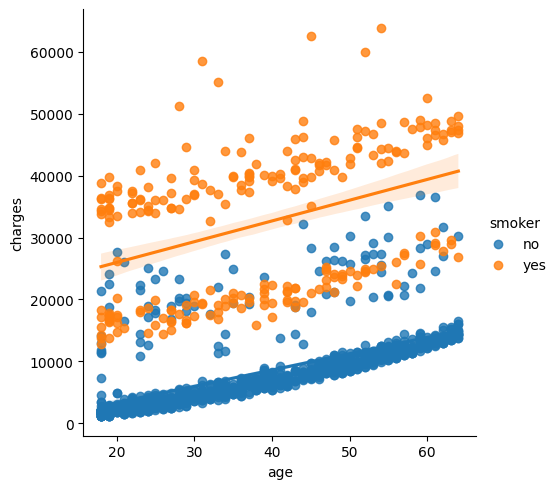

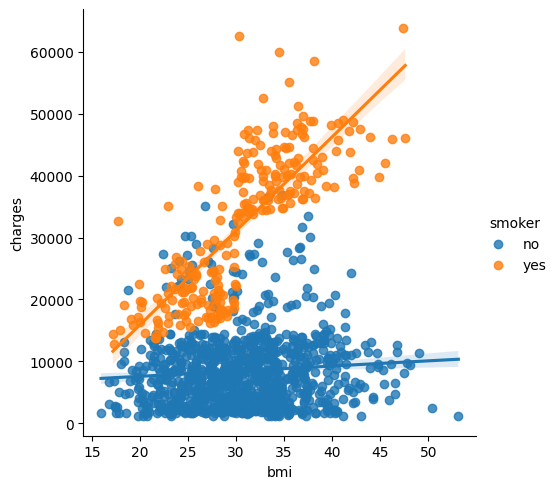

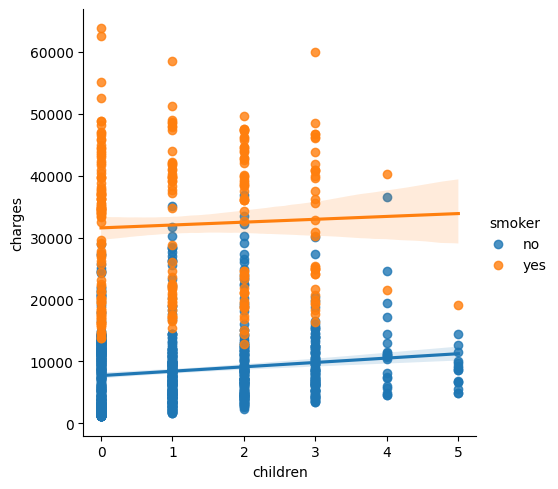

In [22]:
# using the lmplot() function of seaborn, build a scatter plot of age and insurance costs, hue by smoker
# build a second scatter plot of bmi and insurance costs, hue by smoker
# build a third scatter plot of children and insurance costs, hue by smoker

sns.lmplot(data=medical, x="age", y="charges", hue="smoker")

sns.lmplot(data=medical, x="bmi", y="charges", hue="smoker")

sns.lmplot(data=medical, x="children", y="charges", hue="smoker")

• As the ages goes up, the medical charges slightly goes up too.

• For non-smokers, the medical charges does not change much as the bmi goes up. However, for smokers, as the bmi goes up, the medical charges significantly goes up too.

• The number of children does not affect the medical charges much.

### Look for Correlations

In [24]:
# compute pairwise correlation of columns using the corr() method

medical_num = medical.select_dtypes(include=[np.number])
medical_num.corr()

,age,bmi,children,charges
age,1.000000,0.117343,0.060339,0.292502
bmi,0.117343,1.000000,0.019848,0.200326
children,0.060339,0.019848,1.000000,0.070937
charges,0.292502,0.200326,0.070937,1.000000


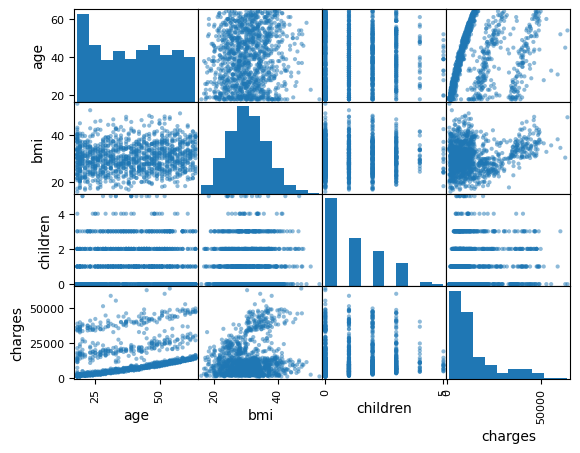

In [18]:
# plot correlation matrix using scatter_matrix() function from pandas.plotting
from pandas.plotting import scatter_matrix

scatter_matrix(medical_num)
plt.show()


Looking at the correlation scatterplots, it seems like the most promising
attribute to predict the charge value is bmi.

<Axes: xlabel='bmi', ylabel='charges'>

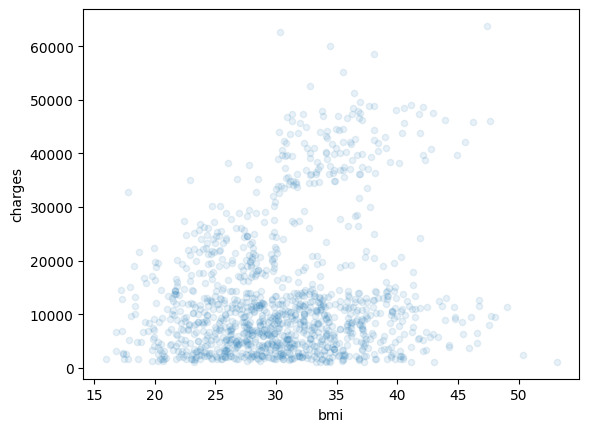

In [19]:
# plot a scatter plot of bmi vs. insurance costs using the medical.plot() method, use the alpha parameter to set the opacity of the points to 0.1

medical.plot(kind="scatter", x="bmi", y="charges", alpha=0.1)

The correlation is somewhat visible as we can clearly see the upward trend.

# Prepare the data for ML

In [26]:
# drop the charges column from the train_set and save the resulting dataset to a variable called `medical`
# create a copy of the train_set labels and save it to a variable called `medical_labels`
# replace None with the correct code

medical = train_set.drop("charges", axis=1)
medical_labels = train_set["charges"].copy()


# Transformation Pipelines


In [27]:
# Create a pipeline for preprocessing the data

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline

num_attribs = ["age", "bmi", "children"]
cat_attribs = ["sex", "smoker", "region"]

num_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler())

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"))

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs)])

medical_prepared = preprocessing.fit_transform(medical)

print(medical_prepared.shape)
print(preprocessing.get_feature_names_out())

(1204, 11)
['num__age' 'num__bmi' 'num__children' 'cat__sex_female' 'cat__sex_male'
 'cat__smoker_no' 'cat__smoker_yes' 'cat__region_northeast'
 'cat__region_northwest' 'cat__region_southeast' 'cat__region_southwest']


# Select and Train a Model


In [28]:
# create a pipeline for preprocessing the data and fitting a linear regression model
from sklearn.linear_model import LinearRegression

lin_reg = make_pipeline(preprocessing, LinearRegression())

# medical_labels is the column we want to predict
# uncomment the following line to fit the model

lin_reg.fit(medical, medical_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['age', 'bmi', 'children']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('linearregression', LinearRegression())])

In [29]:
# Make predictions

medical_predictions = lin_reg.predict(medical)
medical_predictions

array([ 8064., 15232.,  8320., ..., 11520., 37440., 11392.])

In [ ]:
# Compute the RMSE

from sklearn.metrics import mean_squared_error

lin_rmse = mean_squared_error(medical_labels, medical_predictions, squared=False)
lin_rmse

6095.694509549613

In [ ]:
# use DecisionTreeRegressor to train the model
# make predictions on the training set and compute the RMSE

from sklearn.tree import DecisionTreeRegressor

tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor())

tree_reg.fit(medical, medical_labels)

medical_predictions = tree_reg.predict(medical)
tree_rmse = mean_squared_error(medical_labels, medical_predictions, squared=False)
tree_rmse

465.89349301616494

# Evaluation Using Cross-Validation


In [ ]:

from sklearn.model_selection import cross_val_score

tree_rmses = -cross_val_score(tree_reg,
                              medical, medical_labels,
                              scoring="neg_root_mean_squared_error",
                              cv=10)
tree_rmses

array([5458.53176391, 6086.83953824, 7287.87400351, 7129.61039525,
       6791.72234722, 7153.38714323, 6634.46636374, 6793.90779383,
       7262.04776812, 6333.62590842])

In [ ]:
# Compute the mean of the RMSEs

np.mean(tree_rmses)

6693.201302547646

In [ ]:
# use RandomForestRegressor to train the model

from sklearn.ensemble import RandomForestRegressor

forest_reg = make_pipeline(preprocessing, RandomForestRegressor())

forest_reg.fit(medical, medical_labels)

medical_forest_predictions = forest_reg.predict(medical)

forest_rmse = -cross_val_score(forest_reg,
                              medical, medical_labels,
                              scoring="neg_root_mean_squared_error",
                              cv=10)

np.mean(forest_rmse)

4823.140900323067

# Fine-Tune Your Model


## Randomized Search for Good Hyperparameters


In [ ]:
# search for the best hyperparameters

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.pipeline import Pipeline

full_pipeline = Pipeline([("preprocessing", preprocessing),
                          ("random_forest", RandomForestRegressor(random_state=42)),
                          ])

param_distribs = {'random_forest__max_features': randint(low=2,high=20)}

rnd_search = RandomizedSearchCV(full_pipeline,
                                param_distributions=param_distribs,
                                n_iter=10,
                                cv=3,
                                scoring='neg_root_mean_squared_error',
                                random_state=42)

rnd_search.fit(medical, medical_labels)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('standardscaler',
                                                                                                StandardScaler())]),
                                                                               ['age',
                                                                                'bmi',
                                                                                'children']),
                                                                              ('cat',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('onehotencoder',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               ['sex',
                                                                                'smoker',
                                                                                'region'])])),
                                             ('random_forest',
                                              RandomForestRegressor(random_state=42))]),
                   param_distributions={'random_forest__max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x145d7e5e0>},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [ ]:
# print the best search scores

rn_res = pd.DataFrame(rnd_search.cv_results_)
rn_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
rn_res.head(5)["mean_test_score"]

7   -4799.153054
9   -4817.227003
0   -4857.187753
4   -4857.187753
3   -4924.794740
Name: mean_test_score, dtype: float64

In [ ]:
# Print the feature importances

final_model = rnd_search.best_estimator_ # includes preprocessing
feature_importances = final_model["random_forest"].feature_importances_
feature_importances

array([0.14009094, 0.18136751, 0.02282276, 0.00486518, 0.00469003,
       0.26386724, 0.36286974, 0.00547854, 0.00458286, 0.00495756,
       0.00440763])

In [ ]:
# Print the feature importances with the feature names

sorted(zip(feature_importances, final_model["preprocessing"].get_feature_names_out()),reverse=True)

[(0.3628697411081545, 'cat__smoker_yes'),
 (0.2638672426952065, 'cat__smoker_no'),
 (0.18136750711370175, 'num__bmi'),
 (0.14009094306950148, 'num__age'),
 (0.02282276144114145, 'num__children'),
 (0.005478541503125266, 'cat__region_northeast'),
 (0.004957557525484589, 'cat__region_southeast'),
 (0.004865181281764538, 'cat__sex_female'),
 (0.004690030412080289, 'cat__sex_male'),
 (0.0045828643374195, 'cat__region_northwest'),
 (0.0044076295124202925, 'cat__region_southwest')]

In [ ]:
# Evaluate the final model on the test set (find rmse)

rnd_rmse = -cross_val_score(final_model,
                              medical, medical_labels,
                              scoring="neg_root_mean_squared_error",
                              cv=10)

np.mean(rnd_rmse)

4721.717243125056